#Introduccion a la Inteligencia Artificial

## TP4 - Clasificacion con sklearn - Dataset HAR

### Autor: Collado Claudio

## 0. Librerias Clasicas

Importo las librerias clasicas con las cuales trabajamos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dataset con el cual voy a trabajar

Importo el dataset con el cual voy a trabajar: Obtengo los vectores de features y target. Los transformo a DataFrames para su visualizacion en forma tabular

In [2]:
from sklearn.datasets import fetch_openml

# Lee el dataset HAR (1478) desde OpenMl utilizando la funcionalidad de SKLearn
har_dataset = fetch_openml(data_id=1478)

#Features
x = har_dataset.data

#Target
y = har_dataset.target

In [3]:
#Transformo los Features a un DataFrame

#Transformo a DataFrame
x_df = pd.DataFrame(x)

#Agrego el nombre de las columnas
x_df.columns = har_dataset.feature_names

#Observo los 5 primeros registros
x_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V522,V523,V524,V525,V526,V527,V528,V529,V530,V531,V532,V533,V534,V535,V536,V537,V538,V539,V540,V541,V542,V543,V544,V545,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220644,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,0.061436,0.074840,0.198204,-0.264307,0.072545,-0.155320,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,...,-0.999895,-0.988055,-1.0,1.000000,0.678921,-0.701131,-0.909639,-0.989413,-0.987836,-0.986850,-0.986749,-0.996199,-0.989413,-0.999876,-0.989136,-0.720891,-1.000000,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,0.191161,0.086904,0.257615,-0.272505,0.434728,-0.315375,0.439744,-0.269069,0.179414,-0.088952,-0.155804,-0.189763,0.599213,...,-0.999941,-0.994169,-1.0,-1.000000,0.559058,-0.528901,-0.858933,-0.991433,-0.989059,-0.987744,-0.991462,-0.998353,

In [4]:
#Tamaño del dataframe de Features

x_df.shape

(10299, 561)

Segun se observa el dataset contiene 561 features

In [5]:
#Transformo el Target a un DataFrame

#Transformo a DataFrame
y_df = pd.DataFrame(y)

#Agrego el nombre de la columna
y_df.columns = har_dataset.target_names

#Observo los primeros 5 registros
y_df.head()

,Class
0,5
1,5
2,5
3,5
4,5


In [6]:
#Tamaño del dataframe de Target

y_df.shape

(10299, 1)

La cantidad de instancias coinciden: Son 10299 correspondientes a 30 voluntarios realizando diversas actividades

El objetivo de aplicar tecnicas de clasificacion al dataset HAR es el de tratar de predecir para los features dados (valores de acelerometros y giroscopos) a que actividad corresponde de las siguientes catalogadas:

*   WALKING
*   WALKING_UPSTAIRS
*   WALKING_DOWNSTAIRS
*   SITTING
*   STANDING
*   LAYING


## 2. Analisis Exploratorio y Preprocesamiento

In [7]:
#Concateno los dataframes para tenerlos en uno solo

#Concateno por columnas
df = pd.concat([x_df,y_df],axis=1)

#Observo los 5 primeros registros
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V523,V524,V525,V526,V527,V528,V529,V530,V531,V532,V533,V534,V535,V536,V537,V538,V539,V540,V541,V542,V543,V544,V545,V546,V547,V548,V549,V550,V551,V552,V553,V554,V555,V556,V557,V558,V559,V560,V561,Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220644,-0.013429,-0.072692,0.579382,...,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989303,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.997180,-0.983799,-0.986007,-0.627446,-0.850930,-0.911872,0.061436,0.074840,0.198204,-0.264307,0.072545,-0.155320,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,...,-0.988055,-1.0,1.000000,0.678921,-0.701131,-0.909639,-0.989413,-0.987836,-0.986850,-0.986749,-0.996199,-0.989413,-0.999876,-0.989136,-0.720891,-1.000000,-0.035684,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.683250,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,0.191161,0.086904,0.257615,-0.272505,0.434728,-0.315375,0.439744,-0.269069,0.179414,-0.088952,-0.155804,-0.189763,0.599213,...,-0.994169,-1.0,-1.000000,0.559058,-0.528901,-0.858933,-0.991433,-0.989059,-0.987744,-0.991462,-0.998353,-0.991433,-0.999902,-0.989321,-0.763372,-

Instalo Pandas Profiling para intertar realizar un analisis exploratorio rapido

In [8]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=0ff9956a6f88f08cec0dc74416fb9b5e4041a115ec65d6e2f8e23b5688fdfd91
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4fnl53l/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


Intento realizar un analisis exploratorio rapido mediante Pandas Profiling:

In [9]:
#from pandas_profiling import ProfileReport

#analisis_exploratorio = ProfileReport(df)

#analisis_exploratorio

**Aclaracion:** Las lineas de codigo anteriores estan comentadas ya que intente realizar un analisis exploratorio rapido pero tardo demasiado tiempo y no termino, por lo tanto lo suspendi. Supongo que esto paso por la cantidad de Features que estoy trabajando.

Ante la imposibilidad de realizar el analisis exploratorio con Pandas Profiling utilizo la informacion sobre los features brindada por https://www.openml.org/d/1478 y a su vez realizo un analisis exploratorio basico manual:

In [10]:
#Cantidad de nulos en el dataframe

df.isnull().sum().sum()

0

No necesito realizar imputacion ya que no tengo valores NaN

In [11]:
#Cantidad de columnas del tipo numericas

len(df.select_dtypes(include=np.number).columns)

561

*   Se observa que todos los features son numericos

*   La columna restante corresponde al Target el cual es categorical nominal con 6 posibles valores correspondiente a la posicion. No necesito realizar la codificacion ya que los datos vienen codificados

*   A su vez analizando la descripcion de los features obtenidas de  https://www.openml.org/d/1478 se observa que de los 561 features 560 se encuentran escalados entre -1 y +1 y solamente el feature V5 tiene un rango de variacion entre -2 y +1. Por estos motivos considero que no es necesario escalar los datos.


De esta forma concluyo que para el dataset HAR no es necesario realizar preprocesamiento y voy a pasar a la etapa de modelado

## 3. Modelado

### 3.1 Arbol de Decision

Realizo el entrenamiento del modelo con Cross Validarion y obtengo el valor de la metrica promedio de los resultados obtenidos para cada fold

In [12]:
#Importo los modulos que voy a utilizar
from sklearn.model_selection import cross_validate #Cross validation
from sklearn.tree import DecisionTreeClassifier #Clasificador arbol de decision

#Instancio el clasificador
clf_decision_tree = DecisionTreeClassifier(random_state=0)

#Calculo las metricas (scores) del clasificador por medio de cross validation
scores_decision_tree = cross_validate(clf_decision_tree, x, y, cv=10) #10 folds

#Calculo la mediana de los score del test
scores_decision_tree['test_score'].mean()

0.8666876126317378

Realizo las prediccion con Cross Validation e imprimo un reporte de resultados

In [13]:
#Importo los modulos
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#Instancio el clasificador
clf_decision_tree = DecisionTreeClassifier(random_state=0)

#Calculo las prediccion por medio de cross validation
cross_val_predictions_decision_tree = cross_val_predict(clf_decision_tree, x, y, cv=10) #10 folds

#Obtengo un report de las metricas
print(classification_report(y, cross_val_predictions_decision_tree))

              precision    recall  f1-score   support

           1       0.87      0.85      0.86      1722
           2       0.81      0.80      0.80      1544
           3       0.82      0.86      0.84      1406
           4       0.82      0.84      0.83      1777
           5       0.86      0.83      0.84      1906
           6       0.98      1.00      0.99      1944

    accuracy                           0.87     10299
   macro avg       0.86      0.86      0.86     10299
weighted avg       0.87      0.87      0.87     10299



Observo en forma grafica la matriz de confusion

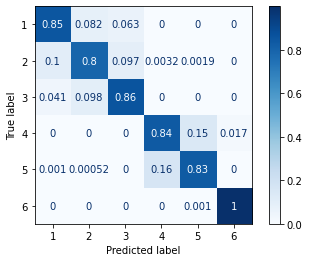

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Construyo la matriz de confusion
conf_mat_decision_tree = confusion_matrix(y, cross_val_predictions_decision_tree,normalize='true')
conf_mat_decision_tree

# Visualizo la matriz de confusión
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix=conf_mat_decision_tree,display_labels=[1,2,3,4,5,6])
disp_decision_tree.plot(cmap=plt.cm.Blues)

### 3.2 Random Forest

Realizo el entrenamiento del modelo con Cross Validarion y obtengo el valor de la metrica promedio de los resultados obtenidos para cada fold

In [15]:
#Importo los modulos que voy a utilizar
from sklearn.model_selection import cross_validate #Cross validation
from sklearn.ensemble import RandomForestClassifier #Clasificador Random Forest

#Instancio el clasificador
clf_random_forest = RandomForestClassifier(random_state=0)

#Calculo las metricas (scores) del clasificador por medio de cross validation
scores_random_forest = cross_validate(clf_random_forest, x, y, cv=10) #10 folds

#Calculo la mediana de los score del test
scores_random_forest['test_score'].mean()

0.9398010133318238

Realizo las prediccion con Cross Validation e imprimo un reporte de resultados

In [16]:
#Importo los modulos
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier #Clasificador Random Forest
from sklearn.metrics import classification_report

#Instancio el clasificador
clf_random_forest = RandomForestClassifier(random_state=0)

#Calculo las prediccion por medio de cross validation
cross_val_predictions_random_forest = cross_val_predict(clf_random_forest, x, y, cv=10) #10 folds

#Obtengo un report de las metricas
print(classification_report(y, cross_val_predictions_random_forest))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95      1722
           2       0.90      0.95      0.93      1544
           3       0.95      0.94      0.94      1406
           4       0.90      0.91      0.91      1777
           5       0.92      0.91      0.92      1906
           6       0.99      1.00      1.00      1944

    accuracy                           0.94     10299
   macro avg       0.94      0.94      0.94     10299
weighted avg       0.94      0.94      0.94     10299



Observo en forma grafica la matriz de confusion

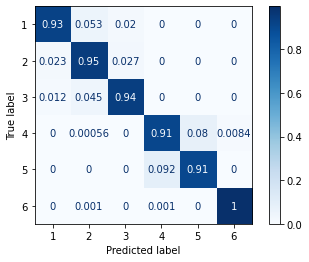

In [17]:
#Construyo la matriz de confusion
conf_mat_random_forest = confusion_matrix(y, cross_val_predictions_random_forest,normalize='true')
conf_mat_random_forest

# Visualizo la matriz de confusión
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix=conf_mat_random_forest,display_labels=[1,2,3,4,5,6])
disp_random_forest.plot(cmap=plt.cm.Blues)

### 3.3 Support Vector Machine

Realizo el entrenamiento del modelo con Cross Validation y obtengo el valor de la metrica promedio de los resultados obtenidos para cada fold

In [18]:
#Importo los modulos que voy a utilizar
from sklearn.model_selection import cross_validate #Cross validation
from sklearn.svm import SVC #Support Vector Machine

#Instancio el clasificador
clf_support_vector = SVC(random_state=0)

#Calculo las metricas (scores) del clasificador por medio de cross validation
scores_support_vector = cross_validate(clf_support_vector, x, y, cv=10) #10 folds

#Calculo la mediana de los score del test
scores_support_vector['test_score'].mean()

0.9509677601970055

Realizo las prediccion con Cross Validation e imprimo un reporte de resultados

In [19]:
#Importo los modulos
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC #Support Vector Machine
from sklearn.metrics import classification_report

#Instancio el clasificador
clf_support_vector = SVC(random_state=0)

#Calculo las prediccion por medio de cross validation
cross_val_predictions_support_vector = cross_val_predict(clf_support_vector, x, y, cv=10) #10 folds

#Obtengo un report de las metricas
print(classification_report(y, cross_val_predictions_support_vector))

              precision    recall  f1-score   support

           1       0.98      0.95      0.97      1722
           2       0.93      0.96      0.95      1544
           3       0.97      0.97      0.97      1406
           4       0.92      0.91      0.91      1777
           5       0.92      0.92      0.92      1906
           6       0.99      1.00      1.00      1944

    accuracy                           0.95     10299
   macro avg       0.95      0.95      0.95     10299
weighted avg       0.95      0.95      0.95     10299



Observo en forma grafica la matriz de confusion

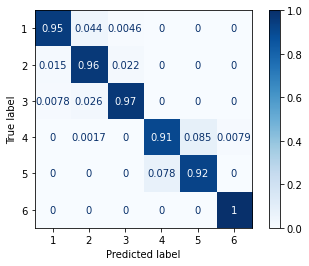

In [20]:
#Construyo la matriz de confusion
conf_mat_support_vector = confusion_matrix(y, cross_val_predictions_support_vector,normalize='true')
conf_mat_support_vector

# Visualizo la matriz de confusión
disp_support_vector = ConfusionMatrixDisplay(confusion_matrix=conf_mat_support_vector,display_labels=[1,2,3,4,5,6])
disp_support_vector.plot(cmap=plt.cm.Blues)

In [28]:
print('Decision Tree accuracy mean: {}'.format(scores_decision_tree['test_score'].mean()))
print('Random Forest accuracy mean: {}'.format(scores_random_forest['test_score'].mean()))
print('Support Vector Machine accuracy mean: {}'.format(scores_support_vector['test_score'].mean()))

Decision Tree accuracy mean: 0.8666876126317378
Random Forest accuracy mean: 0.9398010133318238
Support Vector Machine accuracy mean: 0.9509677601970055


Observando los resultados obtenidos anteriormente y junto con los resultados obtenidos en los classification_report recomendaria el uso del clasificador **Support Vector Machine**

En un futuro con nuevos datos obtenidos de acelerometros y giroscopos de celular de las personas se puede "alimentar" el modelo con nuevos datos y predecir la posicion correspondiente: Por ejemplo se podria utilizar en

  1) Aplicacion movil (ampliando algunas funcionalidades) para rehabilitacion de personas con problemas de movilidad

  2) Tracking de personas en un shopping / patio de compras para determinar conjuntos de actividades/movimientos por ubicacion para evitar conglomerados y/o mejorar el uso de los espacios